In [4]:
# Install necessary libraries (if not already installed)
!pip install pandas openpyxl

# Import required libraries
import pandas as pd

# Load the datasets
file_income = "gross-disposable-household-income-per-head-map-data.csv"
file_inactivity = "economic-inactivity-rate-map-data.csv"

# Read the datasets, skipping metadata rows
df_income = pd.read_csv(file_income, skiprows=7)
df_inactivity = pd.read_csv(file_inactivity, skiprows=7)

# Standardizing column names for merging
df_income.rename(columns={"Area name": "Region", "Value (£)": "Household Income"}, inplace=True)
df_inactivity.rename(columns={"Area name": "Region", "Value (%)": "Economic Inactivity Rate"}, inplace=True)

# Adjust the time period in income data to match inactivity data (2023)
df_income["Time period"] = 2023

# Merge datasets on "Region" (ignoring Time period since they differ)
merged_df = pd.merge(df_income, df_inactivity, on="Region", how="inner")

# Drop unnecessary columns (e.g., duplicated area codes)
merged_df.drop(columns=["Area code_x", "Area code_y", "Time period_x", "Time period_y"], errors="ignore", inplace=True)

# Handle missing values by filling with the mean
# only for numeric columns
numeric_cols = merged_df.select_dtypes(include=['number']).columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())

# Save cleaned dataset to CSV
merged_df.to_csv("merged_economic_data.csv", index=False)

# Display the first few rows to confirm merging
print("Cleaned & Merged Dataset:")
print(merged_df.head())

Cleaned & Merged Dataset:
                 Region  Household Income  Economic Inactivity Rate  \
0            Hartlepool             16934                      29.7   
1         Middlesbrough             16222                      29.2   
2  Redcar and Cleveland             17128                      23.1   
3      Stockton-on-Tees             17935                      22.3   
4            Darlington             18376                      16.0   

   Confidence interval lower  Confidence interval upper  
0                       24.9                       34.5  
1                       24.7                       33.7  
2                       18.6                       27.6  
3                       17.4                       27.2  
4                       12.3                       19.7  


📌 Regression Model Performance:
➡️ Mean Absolute Error (MAE): 3.95
➡️ Mean Squared Error (MSE): 24.89
➡️ Root Mean Squared Error (RMSE): 4.99
➡️ R-Squared (R²): -0.0214
➡️ Intercept: 22.86
➡️ Slope (Coefficient): -0.000068


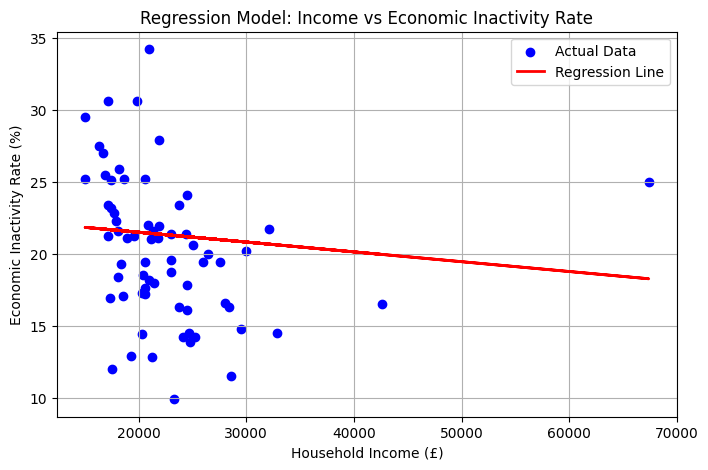

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the datasets (Replace with your actual file paths if needed)
file_income = "gross-disposable-household-income-per-head-map-data.csv"
file_inactivity = "economic-inactivity-rate-map-data.csv"

# Read the datasets, skipping metadata rows
df_income = pd.read_csv(file_income, skiprows=7)
df_inactivity = pd.read_csv(file_inactivity, skiprows=7)

# Standardizing column names for merging
df_income.rename(columns={"Area name": "Region", "Value (£)": "Household Income"}, inplace=True)
df_inactivity.rename(columns={"Area name": "Region", "Value (%)": "Economic Inactivity Rate"}, inplace=True)

# Adjust the time period in income data to match inactivity data (2023)
df_income["Time period"] = 2023

# Merge datasets on "Region" (ignoring Time period since they differ)
merged_df = pd.merge(df_income, df_inactivity, on="Region", how="inner")

# Drop unnecessary columns (e.g., duplicated area codes)
merged_df.drop(columns=["Area code_x", "Area code_y", "Time period_x", "Time period_y"], errors="ignore", inplace=True)

# Handle missing values by filling with the mean
# only for numeric columns
numeric_cols = merged_df.select_dtypes(include=['number']).columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())

# Define independent (X) and dependent (Y) variables
X = merged_df[["Household Income"]]  # Predictor
y = merged_df["Economic Inactivity Rate"]  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display model performance metrics
print("📌 Regression Model Performance:")
print(f"➡️ Mean Absolute Error (MAE): {mae:.2f}")
print(f"➡️ Mean Squared Error (MSE): {mse:.2f}")
print(f"➡️ Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"➡️ R-Squared (R²): {r2:.4f}")
print(f"➡️ Intercept: {model.intercept_:.2f}")
print(f"➡️ Slope (Coefficient): {model.coef_[0]:.6f}")

# Plot regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Household Income (£)")
plt.ylabel("Economic Inactivity Rate (%)")
plt.title("Regression Model: Income vs Economic Inactivity Rate")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the datasets (Replace with actual file paths if running locally)
file_inactivity = "economic-inactivity-rate-map-data.csv"
file_claimant = "claimant-count-map-data.csv"

# Read the datasets, skipping metadata rows
df_inactivity = pd.read_csv(file_inactivity, skiprows=7)
df_claimant = pd.read_csv(file_claimant, skiprows=7)

# Rename columns for consistency
df_inactivity.rename(columns={"Area name": "Region", "Value (%)": "Economic Inactivity Rate"}, inplace=True)
df_claimant.rename(columns={"Area name": "Region", "Value (%)": "Claimant Count Rate"}, inplace=True)

# Adjust the time period for consistency (assuming both datasets are from the same year)
df_inactivity["Time period"] = 2023
df_claimant["Time period"] = 2023

# Merge datasets on "Region"
merged_df = pd.merge(df_inactivity, df_claimant, on=["Region", "Time period"], how="inner")

# Drop unnecessary columns (e.g., area codes, confidence intervals if not needed)
merged_df.drop(columns=["Area code_x", "Area code_y"], errors="ignore", inplace=True)

# Handle missing values by filling with the mean
# only for numeric columns
numeric_cols = merged_df.select_dtypes(include=['number']).columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())

# Save the cleaned dataset
merged_df.to_csv("merged_economic_data2.csv", index=False)

# Display the first few rows to confirm merging
print("Cleaned & Merged Dataset:")
print(merged_df.head())

Cleaned & Merged Dataset:
                 Region  Time period  Economic Inactivity Rate  \
0            Hartlepool         2023                      29.7   
1         Middlesbrough         2023                      29.2   
2  Redcar and Cleveland         2023                      23.1   
3      Stockton-on-Tees         2023                      22.3   
4            Darlington         2023                      16.0   

   Confidence interval lower  Confidence interval upper  Claimant Count Rate  
0                       24.9                       34.5                  5.1  
1                       24.7                       33.7                  6.1  
2                       18.6                       27.6                  4.1  
3                       17.4                       27.2                  4.1  
4                       12.3                       19.7                  4.2  


Logistic regression model with a deprivation score.

In [8]:
# Install necessary libraries (if not already installed)
!pip install pandas numpy scikit-learn openpyxl

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the datasets (Replace with actual file paths if running locally)
file_inactivity = "economic-inactivity-rate-map-data.csv"
file_claimant = "claimant-count-map-data.csv"

# Read the datasets, skipping metadata rows
df_inactivity = pd.read_csv(file_inactivity, skiprows=7)
df_claimant = pd.read_csv(file_claimant, skiprows=7)

# Rename columns for consistency
df_inactivity.rename(columns={"Area name": "Region", "Value (%)": "Economic Inactivity Rate"}, inplace=True)
df_claimant.rename(columns={"Area name": "Region", "Value (%)": "Claimant Count Rate"}, inplace=True)

# Adjust the time period for consistency (assuming both datasets are from the same year)
df_inactivity["Time period"] = 2023
df_claimant["Time period"] = 2023

# Merge datasets on "Region"
merged_df = pd.merge(df_inactivity, df_claimant, on=["Region", "Time period"], how="inner")

# Drop unnecessary columns (e.g., area codes, confidence intervals if not needed)
merged_df.drop(columns=["Area code_x", "Area code_y"], errors="ignore", inplace=True)

# Handle missing values by filling with the mean
# only for numeric columns
numeric_cols = merged_df.select_dtypes(include=['number']).columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())

# Normalize socio-economic factors (0 to 1 scale)
scaler = MinMaxScaler()
features = ["Claimant Count Rate", "Economic Inactivity Rate"]
merged_df[features] = scaler.fit_transform(merged_df[features])

# Create a deprivation score (weighted sum of scaled factors)
merged_df["Deprivation Score"] = (merged_df["Claimant Count Rate"] * 0.5) + (merged_df["Economic Inactivity Rate"] * 0.5)

# Define classification labels based on deprivation score thresholds
def classify_need(score):
    if score > 0.75:
        return "High Need"
    elif score > 0.5:
        return "Moderate Need"
    else:
        return "Low Need"

# Apply classification labels to the dataset
merged_df["Need Category"] = merged_df["Deprivation Score"].apply(classify_need)

# Encode categorical labels into numeric values for logistic regression
label_encoder = LabelEncoder()
merged_df["Need Category Encoded"] = label_encoder.fit_transform(merged_df["Need Category"])

# Define independent (X) and dependent (Y) variables for classification
X = merged_df[["Claimant Count Rate", "Economic Inactivity Rate"]]  # Predictors
y = merged_df["Need Category Encoded"]  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Convert predicted values back to category labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Save the cleaned dataset
merged_df.to_csv("classified_cities_resole.csv", index=False)

# Display results
print(" Logistic Regression Model Performance:")
print(f" Model Accuracy: {accuracy:.4f}")
print("\n Classification Report:\n", classification_rep)

# Display the first few rows of classified cities
print("\n Classified Cities Based on Socio-Economic Need:")
print(merged_df[["Region", "Deprivation Score", "Need Category"]].head(10))


 Logistic Regression Model Performance:
 Model Accuracy: 0.9231

 Classification Report:
                precision    recall  f1-score   support

    High Need       0.00      0.00      0.00         1
     Low Need       0.94      1.00      0.97        60
Moderate Need       0.00      0.00      0.00         4

     accuracy                           0.92        65
    macro avg       0.31      0.33      0.32        65
 weighted avg       0.87      0.92      0.89        65


 Classified Cities Based on Socio-Economic Need:
                  Region  Deprivation Score  Need Category
0             Hartlepool           0.520441  Moderate Need
1          Middlesbrough           0.572942  Moderate Need
2   Redcar and Cleveland           0.358033       Low Need
3       Stockton-on-Tees           0.345649       Low Need
4             Darlington           0.254150       Low Need
5                 Halton           0.425473       Low Need
6             Warrington           0.173244       Low Need


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


scatter plot to show findings

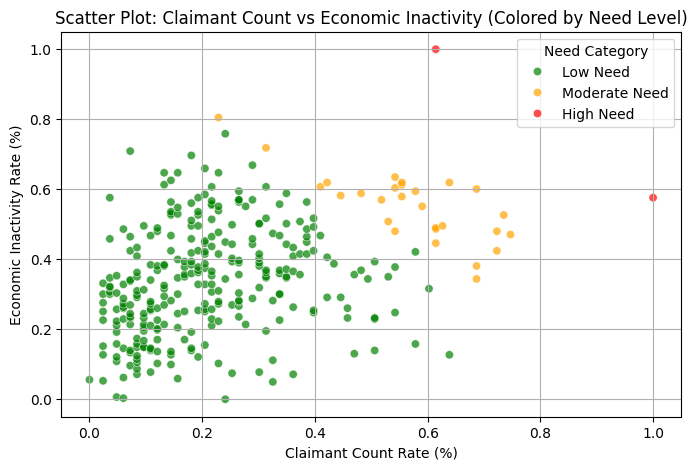

In [11]:
# Scatter plot for Claimant Count Rate vs Economic Inactivity Rate, colored by Need Category
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the merged DataFrame by Deprivation Score (optional)
merged_df_sorted = merged_df.sort_values(by=["Deprivation Score"])

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=merged_df_sorted,  # Use the sorted DataFrame here
    x="Claimant Count Rate",
    y="Economic Inactivity Rate",
    hue="Need Category",
    palette={"Low Need": "green", "Moderate Need": "orange", "High Need": "red"},
    alpha=0.7
)

# Customize the chart
plt.xlabel("Claimant Count Rate (%)")
plt.ylabel("Economic Inactivity Rate (%)")
plt.title("Scatter Plot: Claimant Count vs Economic Inactivity (Colored by Need Level)")
plt.legend(title="Need Category")
plt.grid(True)

# Show the plot
plt.show()

output for 2 cities in red on the scatter plot


In [12]:
# Filter the dataset to show only cities classified as "High Need"
high_need_cities = merged_df_sorted[merged_df_sorted["Need Category"] == "High Need"]

# Display the high-need cities
print(" Cities in High Need for Resole's Footwear Redistribution:")
print(high_need_cities[["Region", "Deprivation Score", "Economic Inactivity Rate", "Claimant Count Rate"]])

 Cities in High Need for Resole's Footwear Redistribution:
         Region  Deprivation Score  Economic Inactivity Rate  \
226  Birmingham           0.787926                  0.575851   
130      Pendle           0.807229                  1.000000   

     Claimant Count Rate  
226             1.000000  
130             0.614458  
